In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import plotnine as p9
import os
import warnings
from scipy import stats

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.max_rows = 999
p9.options.figure_size = (10,7)

In [2]:
PATH = '/MyDocuments/GitHub/curriculum/dig_trans_healthcare/Course/04_evaluating_predictions/'
PATH_I = os.path.join(PATH,'images')

In [3]:
tex_theme = theme(plot_background = element_rect(fill = '#fafafa', color = '#fafafa'), axis_text_x=element_text(size=12),
         axis_text_y=element_text(size=12), axis_title_x=element_text(size=15), axis_title_y=element_text(size=15),
        legend_background = element_rect(fill="#fafafa"), legend_title=element_text(size=15),legend_text=element_text(size=12),
         legend_position=(.8,.7))
tex_theme_blank = theme(plot_background = element_rect(fill = '#fafafa', color = 'black'), axis_text_x=element_blank(),
          axis_text_y=element_blank(),axis_ticks=element_blank(),
          axis_title_x=element_blank(),axis_title_y=element_blank())
blank_theme = theme(axis_line=element_blank(),axis_text_x=element_blank(),
          axis_text_y=element_blank(),axis_ticks=element_blank(),
          axis_title_x=element_blank(),axis_title_y=element_blank(),
          panel_background=element_blank(),panel_border=element_blank(),panel_grid_major=element_blank(),
          panel_grid_minor=element_blank(),
           plot_background = element_rect(fill = '#fafafa', color = '#fafafa'))



In [107]:
def norm_line(ptct,grp,mn=0,sd=1):
    x = np.linspace(mn-sd*4,mn+sd*4,ptct)
    y = 1/np.sqrt(2*np.pi*sd**2) * np.exp(-1*(x-mn)**2/(2*sd**2))
    df = pd.DataFrame({'x':x,'y':y,'grp':grp})
    return df    

In [91]:
from plotnine import * 
from plotnine.data import *

In [134]:
def norm_line(ptct,grp,mn=0,sd=1):
    x = np.linspace(mn-sd*4,mn+sd*4,ptct)
    y = 1/np.sqrt(2*np.pi*sd**2) * np.exp(-1*(x-mn)**2/(2*sd**2))
    df = pd.DataFrame({'x':x,'y':y,'Disease':grp})
    return df  

In [ ]:
df1 = norm_line(ptct=200,grp='Positive',mn=45,sd=7)
df2 = norm_line(ptct=200,grp='Negative',mn=35,sd=5)
df_grp = pd.concat([df1,df2])
thresh = 40
max_val = 1.2*max(df2.y.max(),df1.y.max())
df3 = pd.DataFrame({'x':[thresh, thresh],'y':[0,max_val]})

In [203]:
# df_grp.reset_index(inplace=True, drop=True)
# p = (ggplot(df, aes(x='date', y='value',color='variable'))
thresh = 40
max_val = 1.2*max(df2.y.max(),df1.y.max())
df3 = pd.DataFrame({'x':[thresh, thresh],'y':[0,max_val]})
p = (ggplot(df_grp, aes(x='x', y='y',color='Disease'))
    + geom_line(size=1.5)
    + scale_color_manual(['b','r'])
    + geom_area(df1.loc[df1.x<=(thresh+.1),:],aes('x', 'y'),fill='red',alpha=0.3,show_legend=False, color=None)
    + geom_area(df2.loc[df2.x>=(thresh-.1),:],aes('x', 'y'),fill='blue',alpha=0.3,show_legend=False, color=None)
    + geom_line(df3,aes('x','y'),color='k',size=1.5,show_legend=False)
    + xlab('Threshold')
    + ylab('Density')
    + tex_theme )
# p
p.save(f'{PATH_I}/overlap_distr.pdf')

E:\Anaconda3\envs\curriculum\lib\site-packages\plotnine\ggplot.py:688: UserWarning: Saving 10 x 7 in image.
  from_inches(height, units), units))
E:\Anaconda3\envs\curriculum\lib\site-packages\plotnine\ggplot.py:689: UserWarning: Filename: /MyDocuments/GitHub/curriculum/dig_trans_healthcare/Course/04_evaluating_predictions/images/overlap_distr.pdf
  warn('Filename: {}'.format(filename))


In [319]:
p = (ggplot(df_grp, aes(x='x', y='y',color='Disease'))
    + geom_line(size=1.5,show_legend=False)
    + scale_color_manual(['b','r'])
    + xlab('Threshold')
    + ylab('Density')
    + tex_theme_blank)
# p
p.save(f'{PATH_I}/overlap_distr_no_thresh.pdf')

E:\Anaconda3\envs\curriculum\lib\site-packages\plotnine\ggplot.py:688: UserWarning: Saving 10 x 7 in image.
  from_inches(height, units), units))
E:\Anaconda3\envs\curriculum\lib\site-packages\plotnine\ggplot.py:689: UserWarning: Filename: /MyDocuments/GitHub/curriculum/dig_trans_healthcare/Course/04_evaluating_predictions/images/overlap_distr_no_thresh.pdf
  warn('Filename: {}'.format(filename))


In [209]:
thresh = 47
max_val = 1.2*max(df2.y.max(),df1.y.max())
df3 = pd.DataFrame({'x':[thresh, thresh],'y':[0,max_val]})
p = (ggplot(df_grp, aes(x='x', y='y',color='Disease'))
    + geom_line(size=1.5)
    + scale_color_manual(['b','r'])
    + geom_area(df1.loc[df1.x<=(thresh+.1),:],aes('x', 'y'),fill='red',alpha=0.3,show_legend=False, color=None)
    + geom_area(df2.loc[df2.x>=(thresh-.1),:],aes('x', 'y'),fill='blue',alpha=0.3,show_legend=False, color=None)
    + geom_line(df3,aes('x','y'),color='k',size=1.5,show_legend=False)
    + xlab('Threshold')
    + ylab('Density')
    + tex_theme )
p.save(f'{PATH_I}/overlap_distr_thi.pdf')

E:\Anaconda3\envs\curriculum\lib\site-packages\plotnine\ggplot.py:688: UserWarning: Saving 10 x 7 in image.
  from_inches(height, units), units))
E:\Anaconda3\envs\curriculum\lib\site-packages\plotnine\ggplot.py:689: UserWarning: Filename: /MyDocuments/GitHub/curriculum/dig_trans_healthcare/Course/04_evaluating_predictions/images/overlap_distr_thi.pdf
  warn('Filename: {}'.format(filename))


In [90]:
f'{PATH_I}test2.pdf'

'/MyDocuments/GitHub/curriculum/dig_trans_healthcare/Course/04_evaluating_predictions/imagestest2.pdf'

# ROC curve

In [289]:
diag = pd.DataFrame({'x':[0,1],'y':[0,1]})

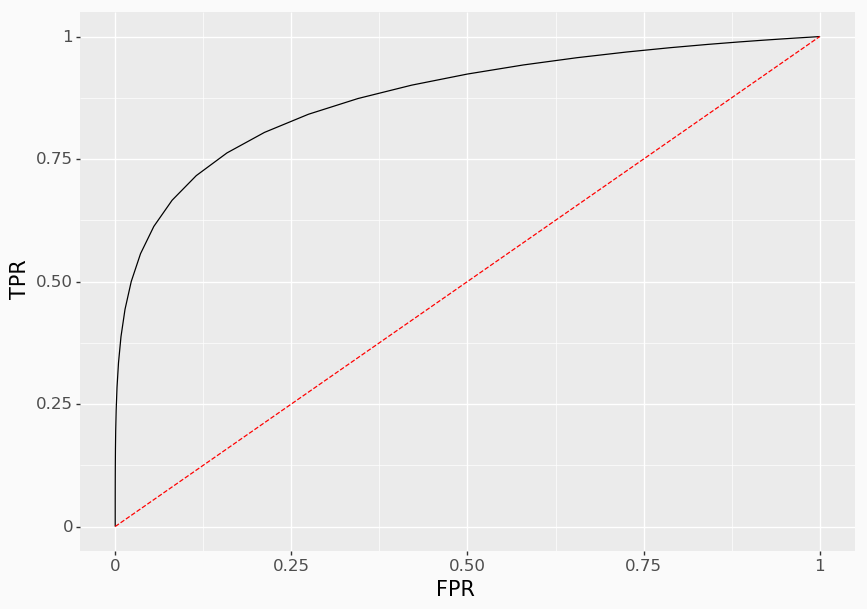

<ggplot: (12485068)>

In [298]:
cdf_pos=stats.norm.cdf(range(100,0,-1), scale=7, loc=45)
cdf_neg=stats.norm.cdf(range(100,0,-1), scale=5, loc=35)
df_cdf = pd.DataFrame({'TPR':1-cdf_pos,'FPR':1-cdf_neg})
diag = pd.DataFrame({'x':[0,1],'y':[0,1]})
p2 = ggplot() + geom_line(df_cdf,aes('FPR','TPR'))  + geom_line(diag, aes('x','y'),linetype='dashed',color='r') + tex_theme
    
p2

In [301]:
p2.save(f'{PATH_I}/ROC.pdf')

E:\Anaconda3\envs\curriculum\lib\site-packages\plotnine\ggplot.py:688: UserWarning: Saving 10 x 7 in image.
  from_inches(height, units), units))
E:\Anaconda3\envs\curriculum\lib\site-packages\plotnine\ggplot.py:689: UserWarning: Filename: /MyDocuments/GitHub/curriculum/dig_trans_healthcare/Course/04_evaluating_predictions/images/ROC.pdf
  warn('Filename: {}'.format(filename))


# AUC vs prevalence

In [321]:
cdf_pos=stats.norm.cdf(range(100,0,-1), scale=1, loc=50)
# cdf_neg=stats.norm.cdf(range(100,0,-1), scale=5, loc=35)

In [322]:
cdf_pos

array([1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       9.99999999e-001, 9.99999713e-001, 9.99968329e-001, 9.98650102e-001,
       9.77249868e-001, 8.41344746e-001, 5.00000000e-001, 1.58655254e-001,
       2.27501319e-002, 1

In [ ]:
p = (ggplot(df_grp, aes(x='x', y='y',color='Disease'))
p = (ggplot(cdf_pos)     
    + geom_line(size=1.5,show_legend=False)
    + scale_color_manual(['b','r'])
    + xlab('Threshold')
    + ylab('Density')
    + tex_theme_blank)

In [331]:
y.sum()

49.89997285406799

In [4]:
x = np.linspace(0,100,10**4)
y1 = stats.norm.pdf(x,40,4)
y2 = stats.norm.pdf(x,25,5)
pos = 0.65
y1 = y1*pos
y2 = y2*(1-pos)
# y.sum()

64.99350000000001 34.996490020146716


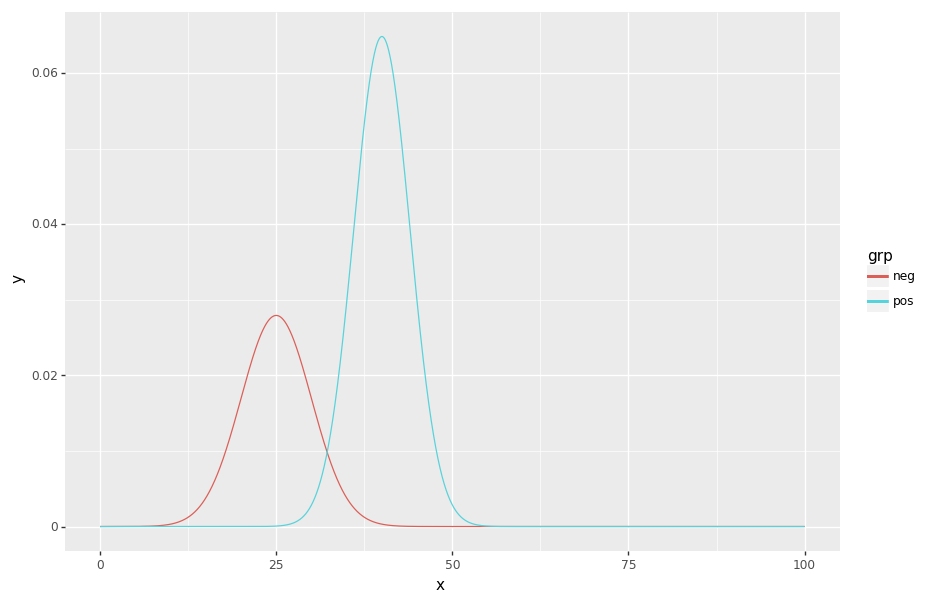

<ggplot: (12080399)>

In [5]:
df1 = pd.DataFrame({'x':x,'y':y1,'grp':'pos'})
df2 = pd.DataFrame({'x':x,'y':y2,'grp':'neg'})
df_grp = pd.concat([df1,df2])
print(y1.sum(),y2.sum())
ggplot(df_grp,aes('x','y',color='grp')) + geom_line()

In [13]:
df_dif = pd.DataFrame({'x':x,'pos':y1,'neg':y2})
df_dif.loc[df_dif.x<=40,['pos','neg']].sum().tolist()

[32.49026718632246, 34.949217359040816]

In [17]:
stats.norm.cdf(40,loc=40,scale=4)*.65

0.325

In [53]:
eps = 10**-20
mn_p = 40
mn_n = 25
scl_p = 5
scl_n = 4
prp_p = 0.65
prp_n = 1-prp_p
TN, FN = [], []
TN = stats.norm.cdf(range(100),loc=mn_n,scale=scl_n)*prp_n
FN = stats.norm.cdf(range(100),loc=mn_p,scale=scl_p)*prp_p
TP = prp_p-FN
FP = prp_n-TN
sens = (TP+eps)/(TP+FN+eps)
spec = (TN+eps)/(TN+FP+eps)
PPV = (TP+eps)/(TP+FP+eps)
NPV = (TN+eps)/(TN+FN+eps)

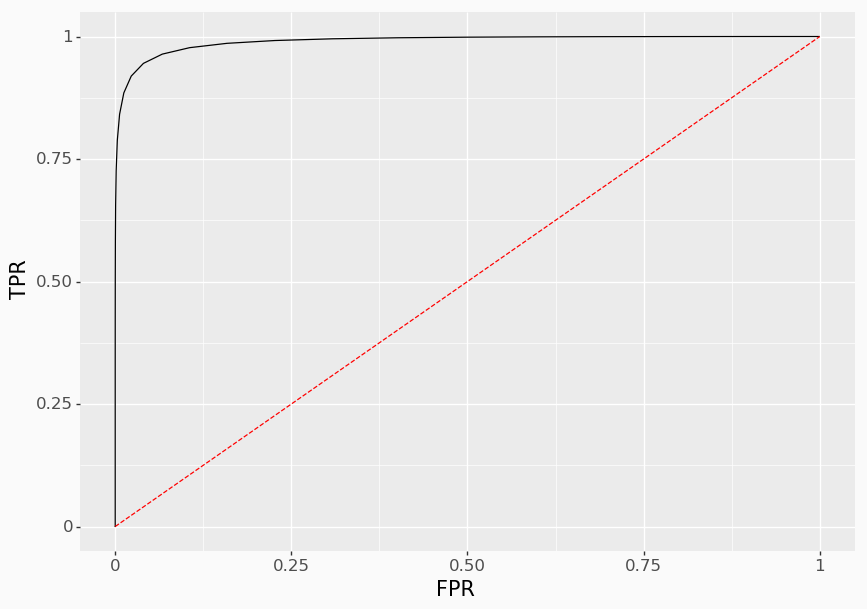

<ggplot: (12118988)>

In [55]:
df_cdf = pd.DataFrame({'TPR':sens,'FPR':1-spec})
diag = pd.DataFrame({'x':[0,1],'y':[0,1]})
p2 = ggplot() + geom_line(df_cdf,aes('FPR','TPR'))  + geom_line(diag, aes('x','y'),linetype='dashed',color='r') + tex_theme
p2

In [112]:
eps = 10**-20
mn_p_val = [30]
mn_n_val = [25]
# mn_p = 40
# mn_n = 25
scl_p = 7
scl_n = 4
prp_p_val = [.95] #np.linspace(.1,.9,6)
# prp_p = 0.65
# prp_n = 1-prp_p
# df_cdf = pd.DataFrame({'TPR':[],'FPR':[],'prp_p':[],'mn_p':[],'mn_n':[]})
df_roc_p = pd.DataFrame({'TPR':[],'FPR':[],'prp_p':[],'mn_p':[],'mn_n':[]})
df_roc_n = pd.DataFrame({'TNR':[],'FNR':[],'prp_p':[],'mn_p':[],'mn_n':[]})
for mn_n in mn_n_val:
    for mn_p in mn_p_val:
        for prp_p in prp_p_val:
            prp_n = 1-prp_p
            TN = stats.norm.cdf(range(100),loc=mn_n,scale=scl_n)*prp_n
            FN = stats.norm.cdf(range(100),loc=mn_p,scale=scl_p)*prp_p
            TP = prp_p-FN
            FP = prp_n-TN
            sens = (TP+eps)/(TP+FN+eps)
            spec = (TN+eps)/(TN+FP+eps)
            PPV = (TP+eps)/(TP+FP+eps)
            NPV = (TN+eps)/(TN+FN+eps)
            df_roc_p_tmp = pd.DataFrame({'TPR':sens,'FPR':1-spec,'prp_p':prp_p,'mn_p':str(int(mn_p)),'mn_n':str(int(mn_n))})
            df_roc_p = df_roc_p.append(df_roc_p_tmp, ignore_index=True)
            df_roc_n_tmp = pd.DataFrame({'TNR':spec,'FNR':1-sens,'prp_p':prp_p,'mn_p':str(int(mn_p)),'mn_n':str(int(mn_n))})
            df_roc_n = df_roc_n.append(df_roc_n_tmp, ignore_index=True)

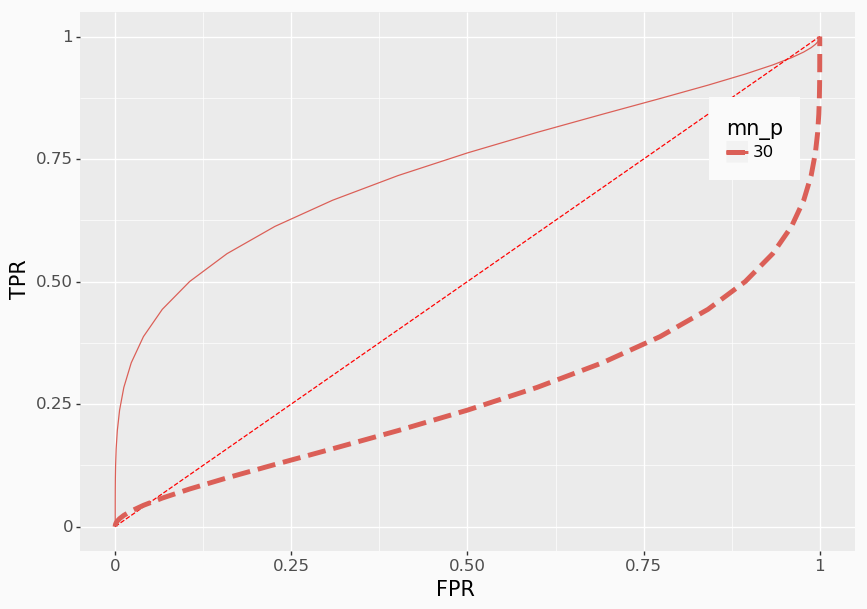

<ggplot: (13522892)>

In [113]:
# cdf_pos=stats.norm.cdf(range(100,0,-1), scale=7, loc=45)
# cdf_neg=stats.norm.cdf(range(100,0,-1), scale=5, loc=35)
# df_cdf = pd.DataFrame({'TPR':1-cdf_pos,'FPR':1-cdf_neg})
diag = pd.DataFrame({'x':[0,1],'y':[0,1]})
p2 = (ggplot() + geom_line(df_roc_p,aes('FPR','TPR',color='mn_p')) + 
 geom_line(diag, aes('x','y'),linetype='dashed',color='r') + 
 geom_line(df_roc_n, aes('TNR','FNR',color='mn_p'),linetype='dashed',size=2) + 
 tex_theme)
    
p2

In [119]:
df_roc_p.FPR.count()

100

In [120]:
df_roc_p.FPR.sum() + df_roc_n.FNR.sum()

94.99999049165956

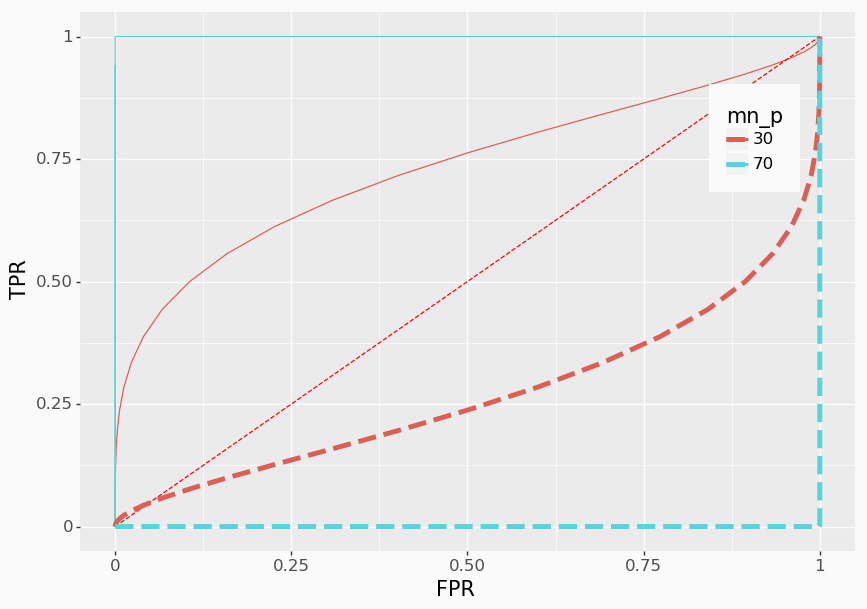

<ggplot: (12545621)>

In [103]:
# cdf_pos=stats.norm.cdf(range(100,0,-1), scale=7, loc=45)
# cdf_neg=stats.norm.cdf(range(100,0,-1), scale=5, loc=35)
# df_cdf = pd.DataFrame({'TPR':1-cdf_pos,'FPR':1-cdf_neg})
diag = pd.DataFrame({'x':[0,1],'y':[0,1]})
p2 = (ggplot() + geom_line(df_roc_p,aes('FPR','TPR',color='mn_p')) + 
 geom_line(diag, aes('x','y'),linetype='dashed',color='r') + 
 geom_line(df_roc_n, aes('TNR','FNR',color='mn_p'),linetype='dashed',size=2) + 
 tex_theme)
    
p2

In [75]:
df = pd.DataFrame({'x':[],'y':[],'grp':[]})
df2 =pd.DataFrame({'x':[0,1],'y':[0,2],'grp':'tst'})
df = df.append(df2, ignore_index=True)

In [76]:
df

,x,y,grp
0,0.0,0.0,tst
1,1.0,2.0,tst
